# Base de dados: Candidatos a vagas na mineradora de ouro

## Importando bibliotecas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Importando base de dados

In [28]:
df = pd.read_csv("dados_candidatos.csv")
df

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


## Limpando os dados

### Renomeando as colunas

In [30]:
df = df.rename(columns={'date': 'data',
                       'cheveux': 'cabelo', 
                        'age': 'idade',
                        'exp': 'experiencia',
                        'salaire': 'salario',
                        'sexe': 'sexo',
                        'diplome': 'diploma',
                        'specialite': 'especialidade',
                        'note': 'nota',
                        'dispo': 'Disponibilidade',
                        'embauche': 'contratado'
                       })
                   
df

,Unnamed: 0,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,Disponibilidade,contratado
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


### Renomeando os dados categóricos

In [31]:

df['diploma'].replace({"licence": "Licenciatura",
                           "bac":"Bacharelado",
                           "master": "Mestrado",
                           "doctorat": "Doutorado",
                           "": "Sem Formação"}
                            , inplace = True)

df["cabelo"].replace({"roux": "Ruivo",
                           "chatain": "Loiro Escuro",
                           "blond": "Loiro",
                           "brun": "Castanho"}
                            , inplace = True)
df["especialidade"].replace({"archeologie": "Arqueologia",
                                 "detective": "Detetive",
                                 "forage": "Perfuração",
                                 "geologie": "Geologia",
                                 "": "Sem Especialização"}
                            , inplace = True)
df

,Unnamed: 0,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,Disponibilidade,contratado
0,0,2012-06-02,Ruivo,25.0,9.0,26803.0,F,Licenciatura,Geologia,97.08,non,0
1,1,2011-04-21,Loiro,35.0,13.0,38166.0,M,Licenciatura,Perfuração,63.86,non,0
2,2,2012-09-07,Loiro,29.0,13.0,35207.0,M,Licenciatura,Geologia,78.50,non,0
3,3,2011-07-01,Castanho,NaN,12.0,32442.0,M,Licenciatura,Geologia,45.09,non,0
4,4,2012-08-07,Ruivo,35.0,6.0,28533.0,F,Licenciatura,Detetive,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47.0,9.0,35723.0,M,Licenciatura,Geologia,66.47,non,0
19996,19996,2010-09-19,Loiro Escuro,38.0,10.0,33570.0,F,Mestrado,Geologia,62.29,non,1
19997,19997,2010-09-02,Loiro Escuro,23.0,6.0,33751.0,F,Doutorado,Detetive,103.48,oui,0
19998,19998,2011-12-06,Loiro Escuro,33.0,11.0,34167.0,F,Licenciatura,Detetive,73.35,non,0


### Removendo dados inválidos
Algumas variáveis da base de dados estão incoerentes, como idade negativa. Esse dados serão removidos.

In [32]:
#df['idade'].replace({"": "0", None: "0"}, inplace = True)
#df['idade'].astype('int')
df.info

<bound method DataFrame.info of        Unnamed: 0        data        cabelo  idade  experiencia  salario sexo  \
0               0  2012-06-02         Ruivo   25.0          9.0  26803.0    F   
1               1  2011-04-21         Loiro   35.0         13.0  38166.0    M   
2               2  2012-09-07         Loiro   29.0         13.0  35207.0    M   
3               3  2011-07-01      Castanho    NaN         12.0  32442.0    M   
4               4  2012-08-07         Ruivo   35.0          6.0  28533.0    F   
...           ...         ...           ...    ...          ...      ...  ...   
19995       19995  2012-03-10         Ruivo   47.0          9.0  35723.0    M   
19996       19996  2010-09-19  Loiro Escuro   38.0         10.0  33570.0    F   
19997       19997  2010-09-02  Loiro Escuro   23.0          6.0  33751.0    F   
19998       19998  2011-12-06  Loiro Escuro   33.0         11.0  34167.0    F   
19999       19999  2010-11-29      Castanho   35.0         14.0  44499.0    M

## Análise Exploratória dos Dados

### Uma pessoa com formação mais alta possui nota maior na prova?

A fim de analisarmos a relação entre o nível da formação de uma pessoa e a sua nota na prova, vamos construir um  gráfico de boxplot. Para melhorar a sua interpretação, os boxplots foram ordenados de maneira crescente à sua mediana.

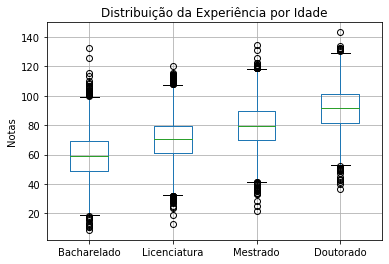

In [48]:
def boxplot_sorted(df, by, column):
  df_h1_ordenado = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df_h1_ordenado.median().sort_values()
  df_h1_ordenado[meds.index].boxplot()
  plt.title("Distribuição da Experiência por Idade")
  plt.ylabel("Notas")

df_h1 = df    
    
boxplot_sorted(df_h1, by="diploma", column="nota")

Percebe-se, portanto, que a mediana das notas dos candidatos com um nível de formação maior tende a ser mais alta do que aqueles com um nível de formação menor.

### Pessoas mais velhas possuem mais experiência?

Para analisar essa questão, vamos plotar um gráfico de dispersão entre as variáveis Experiência e Idade.

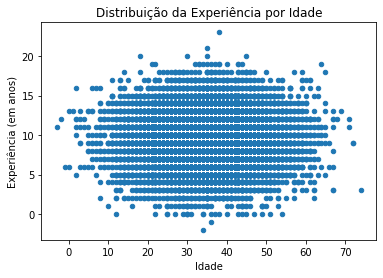

In [46]:
df_h2 = df
scatter_plot=df_h2.plot.scatter(x='idade',y='experiencia')
scatter_plot.plot()
plt.title("Distribuição da Experiência por Idade")
plt.xlabel("Idade")
plt.ylabel("Experiência (em anos)")
plt.show()

Observando o gráfico, percebe-se que não existe uma relação entre a idade e os anos de experiência de uma pessoa. Portanto, pessoas mais velhas não necessariamente possuem mais experiência que as outras.

### Existe influência da expectativa salarial com a contratação?

In [ ]:
df_h3 = df

df_h3.query('contratado == 1')
